<a href="https://colab.research.google.com/github/IImbryk/ml_2024/blob/main/3_MSE/LinearRegression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

California Housing Dataset — это реальный набор данных о стоимости жилья в Калифорнии на основе переписи населения США 1990 года.

Количество записей: 20,640

Количество признаков: 8

Целевая переменная: Медианная стоимость домов в районе (в сотнях тысяч долларов)

In [1]:
# 1. Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns  # Используем seaborn для улучшенной визуализации

In [2]:
# Установим стиль графиков
# plt.style.use('seaborn-darkgrid')

In [3]:
# 2. Подготовка данных
# В качестве примера используем данные о недвижимости (дата-фрейм Boston из scikit-learn больше не доступен)
# Используем вместо этого набор данных California Housing
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [4]:
# Создаем датафрейм
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

In [5]:
df = df[df['Price'] <= 4.8]

<Axes: >

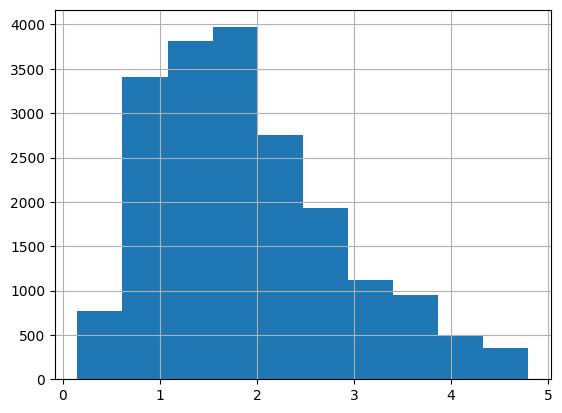

In [6]:
df['Price'].hist()

In [7]:
df[df['Price'] != 5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


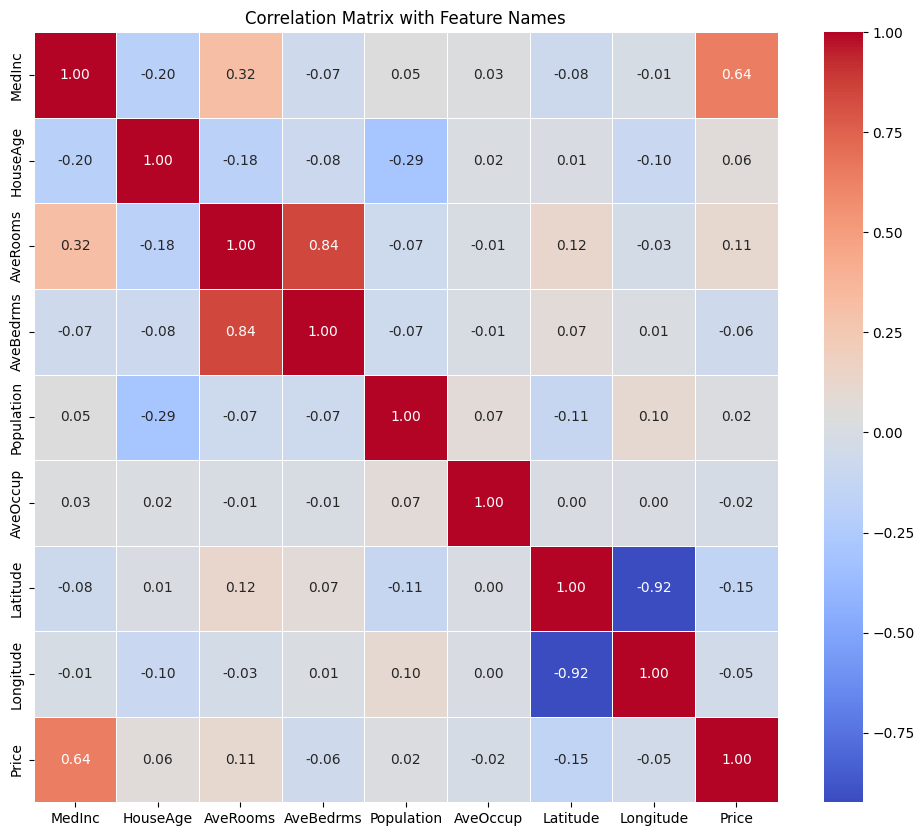

In [8]:

# Просмотрим первые 5 строк данных
df.head()

# 3. Анализ данных
# Посмотрим на корреляцию между признаками
correlation_matrix = df.corr()
# Визуализация матрицы корреляции с названиями признаков
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix with Feature Names')
plt.show()

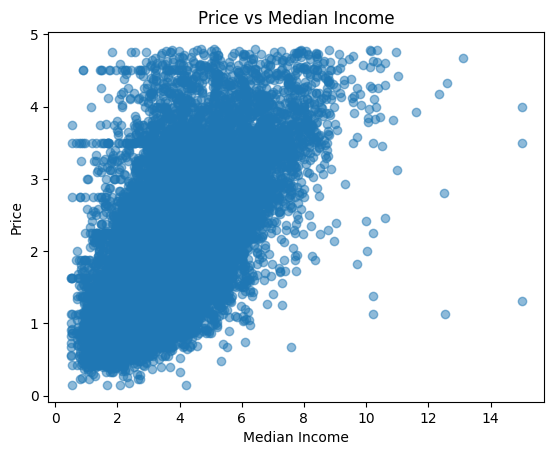

In [9]:
# Построим график зависимости целевой переменной от одного из признаков
plt.scatter(df['MedInc'], df['Price'], alpha=0.5)
plt.title('Price vs Median Income')
plt.xlabel('Median Income')
plt.ylabel('Price')
plt.show()

In [10]:
# 4. Разделение данных на обучающую и тестовую выборки
X = df[['MedInc']]  # Используем только один признак для простоты
y = df['Price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# 5. Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# 6. Предсказание на тестовой выборке
y_pred = model.predict(X_test)

Среднеквадратичная ошибка (Mean Squared Error, MSE) — это метрика для оценки качества модели регрессии. Она измеряет среднее значение квадратов ошибок между предсказанными и фактическими значениями. Формула для расчета MSE выглядит так:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
где:
- \\( n \\) — количество наблюдений,
- \\( y_i \\) — истинное значение,
- \\( \hat{y}_i \\) — предсказанное значение.


MSE всегда неотрицательно; чем меньше значение MSE, тем лучше модель. Однако MSE чувствителен к выбросам, так как ошибки возводятся в квадрат.

▎Коэффициент детерминации (R²)

Коэффициент детерминации (R²) — это статистическая мера, которая показывает, насколько хорошо модель объясняет вариацию целевой переменной. Он принимает значения от 0 до 1:

- \\( R² = 1 \\) означает, что модель полностью объясняет вариацию данных.
- \\( R² = 0 \\) означает, что модель не объясняет вариацию данных лучше, чем простая средняя.

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
где:
- \\( y_i \\) — истинное значение,
- \\( \hat{y}_i \\) — предсказанное значение,
- \\( \bar{y} \\) — среднее значение истинных значений.

Коэффициент детерминации помогает понять, насколько хорошо модель подходит под данные и насколько она предсказуема.

In [14]:
# 7. Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.5349626594534704
R² Score: 0.41916379081599986


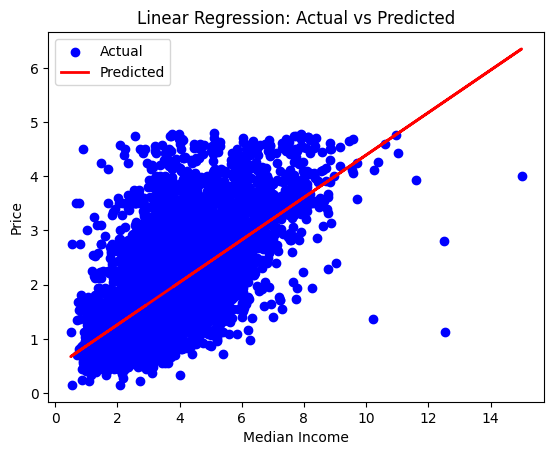

In [15]:
# 8. Визуализация результатов
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Median Income')
plt.ylabel('Price')
plt.legend()
plt.show()

In [16]:
# Выполним кросс-валидацию с 5 фолдами
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Оценка кросс-валидации
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Среднее значение R² на кросс-валидации: {np.mean(cv_scores)}")

# Обучаем модель на всех данных (обычно делается после оценки кросс-валидации)
model.fit(X, y)

Cross-Validation R² Scores: [0.40479704 0.18434118 0.42544968 0.26821464 0.43827533]
Среднее значение R² на кросс-валидации: 0.34421557313862783


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
import pickle

# Сохранение модели
with open('model_linear_regression_example.pkl', 'wb') as file:
    pickle.dump(model, file)

# # Загрузка модели

# with open('model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)